In [1]:
"""
Logistic regression is pretty similar to Linear Regression.
With the only difference that the hypothesis function is using the sigmoid
function and the J is not the least squares function. It is the binary cross
entropy function.

Comment to learn respective Support Vector Machines:

Observe that we also have SVM algorithm. Why SVMs if we can do logistic regression to classify?
Why were they (SVM) invented?

Even though logistic regression is a powerful algorithm for classification, SVMs were devolped to
solve some limitations of log reg, e.g., when the data is not linearly separable. SVMs provide a more
flexible and powerful approach for classification. Moreover, there are a few advantages:

1) SVMs are more robust to outliers, they aim to maximize the margin between the classes, which helps
to reduce the impact of outliers.
2) SVMs can handle non-linearly separable data by using kernel tricks. They can transdorm the data
into higher dmensional space where it becomes easier to separate the classes linearly, e.g., circular
boundary.
3) With SVMs you can choose different kernel tricks and hyperparameters to tune the model and achieve better
performance.
"""
import numpy as np

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

class LogisticRegression():


  def __init__(self, alpha=0.01, n_iters=1000):

    self.alpha=alpha
    self.n_iters=n_iters
    self.weights= None
    self.bias= None

  def fit(self, X, y):

    n_samples, n_features = X.shape
    self.weights=np.zeros(n_features)
    self.bias=0

    for i in range(self.n_iters):

      #Guess computation
      linear_pred = np.dot(X, self.weights)+self.bias
      prediction=sigmoid(linear_pred) #Observe that this is a probability \in (0,1)

      #Gradients (GD)
      dw=(1/n_samples)*2*np.dot(X.T, (prediction-y))
      db=(1/n_samples)*2*np.sum(prediction-y)

      #Updates
      self.weights=self.weights-self.alpha*dw
      self.bias=self.bias-self.alpha*db


  def predict(self, X):

    linear_pred = np.dot(X, self.weights)+self.bias
    y_pred=sigmoid(linear_pred) 
    y_label=[0 if y<=0.5 else 1 for y in y_pred] #Return the label category (0,1) based on the probability previously computed
    return self.weights, self.bias, linear_pred, y_pred, y_label #returns an array with the labels for each example x(i) from the dataset

  def accuracy(self, y_pred, y_test):

    return np.sum(y_pred==y_test)/len(y_test)

In [3]:
"""
Let´s grab a dataset to check our model. Let´s import the libraries too.
"""
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [30]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=names, na_values='?')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [31]:
"""
Observe that the target value contains values between (0-4). Nonetheless, we will simpligy it by 0 (no desease) and 1 (desease).
"""
df = df.replace(to_replace=[1,2,3,4], value=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,1.0,150.0,0.0,2.3,1.0,0.0,6.0,0
1,67.0,1.0,1.0,160.0,286.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0,1.0,1
2,67.0,1.0,1.0,120.0,229.0,0.0,1.0,129.0,1.0,2.6,1.0,1.0,7.0,1
3,37.0,1.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,1.0,0.0,1.0,0
4,41.0,0.0,1.0,130.0,204.0,0.0,1.0,172.0,0.0,1.4,1.0,0.0,1.0,0


In [6]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


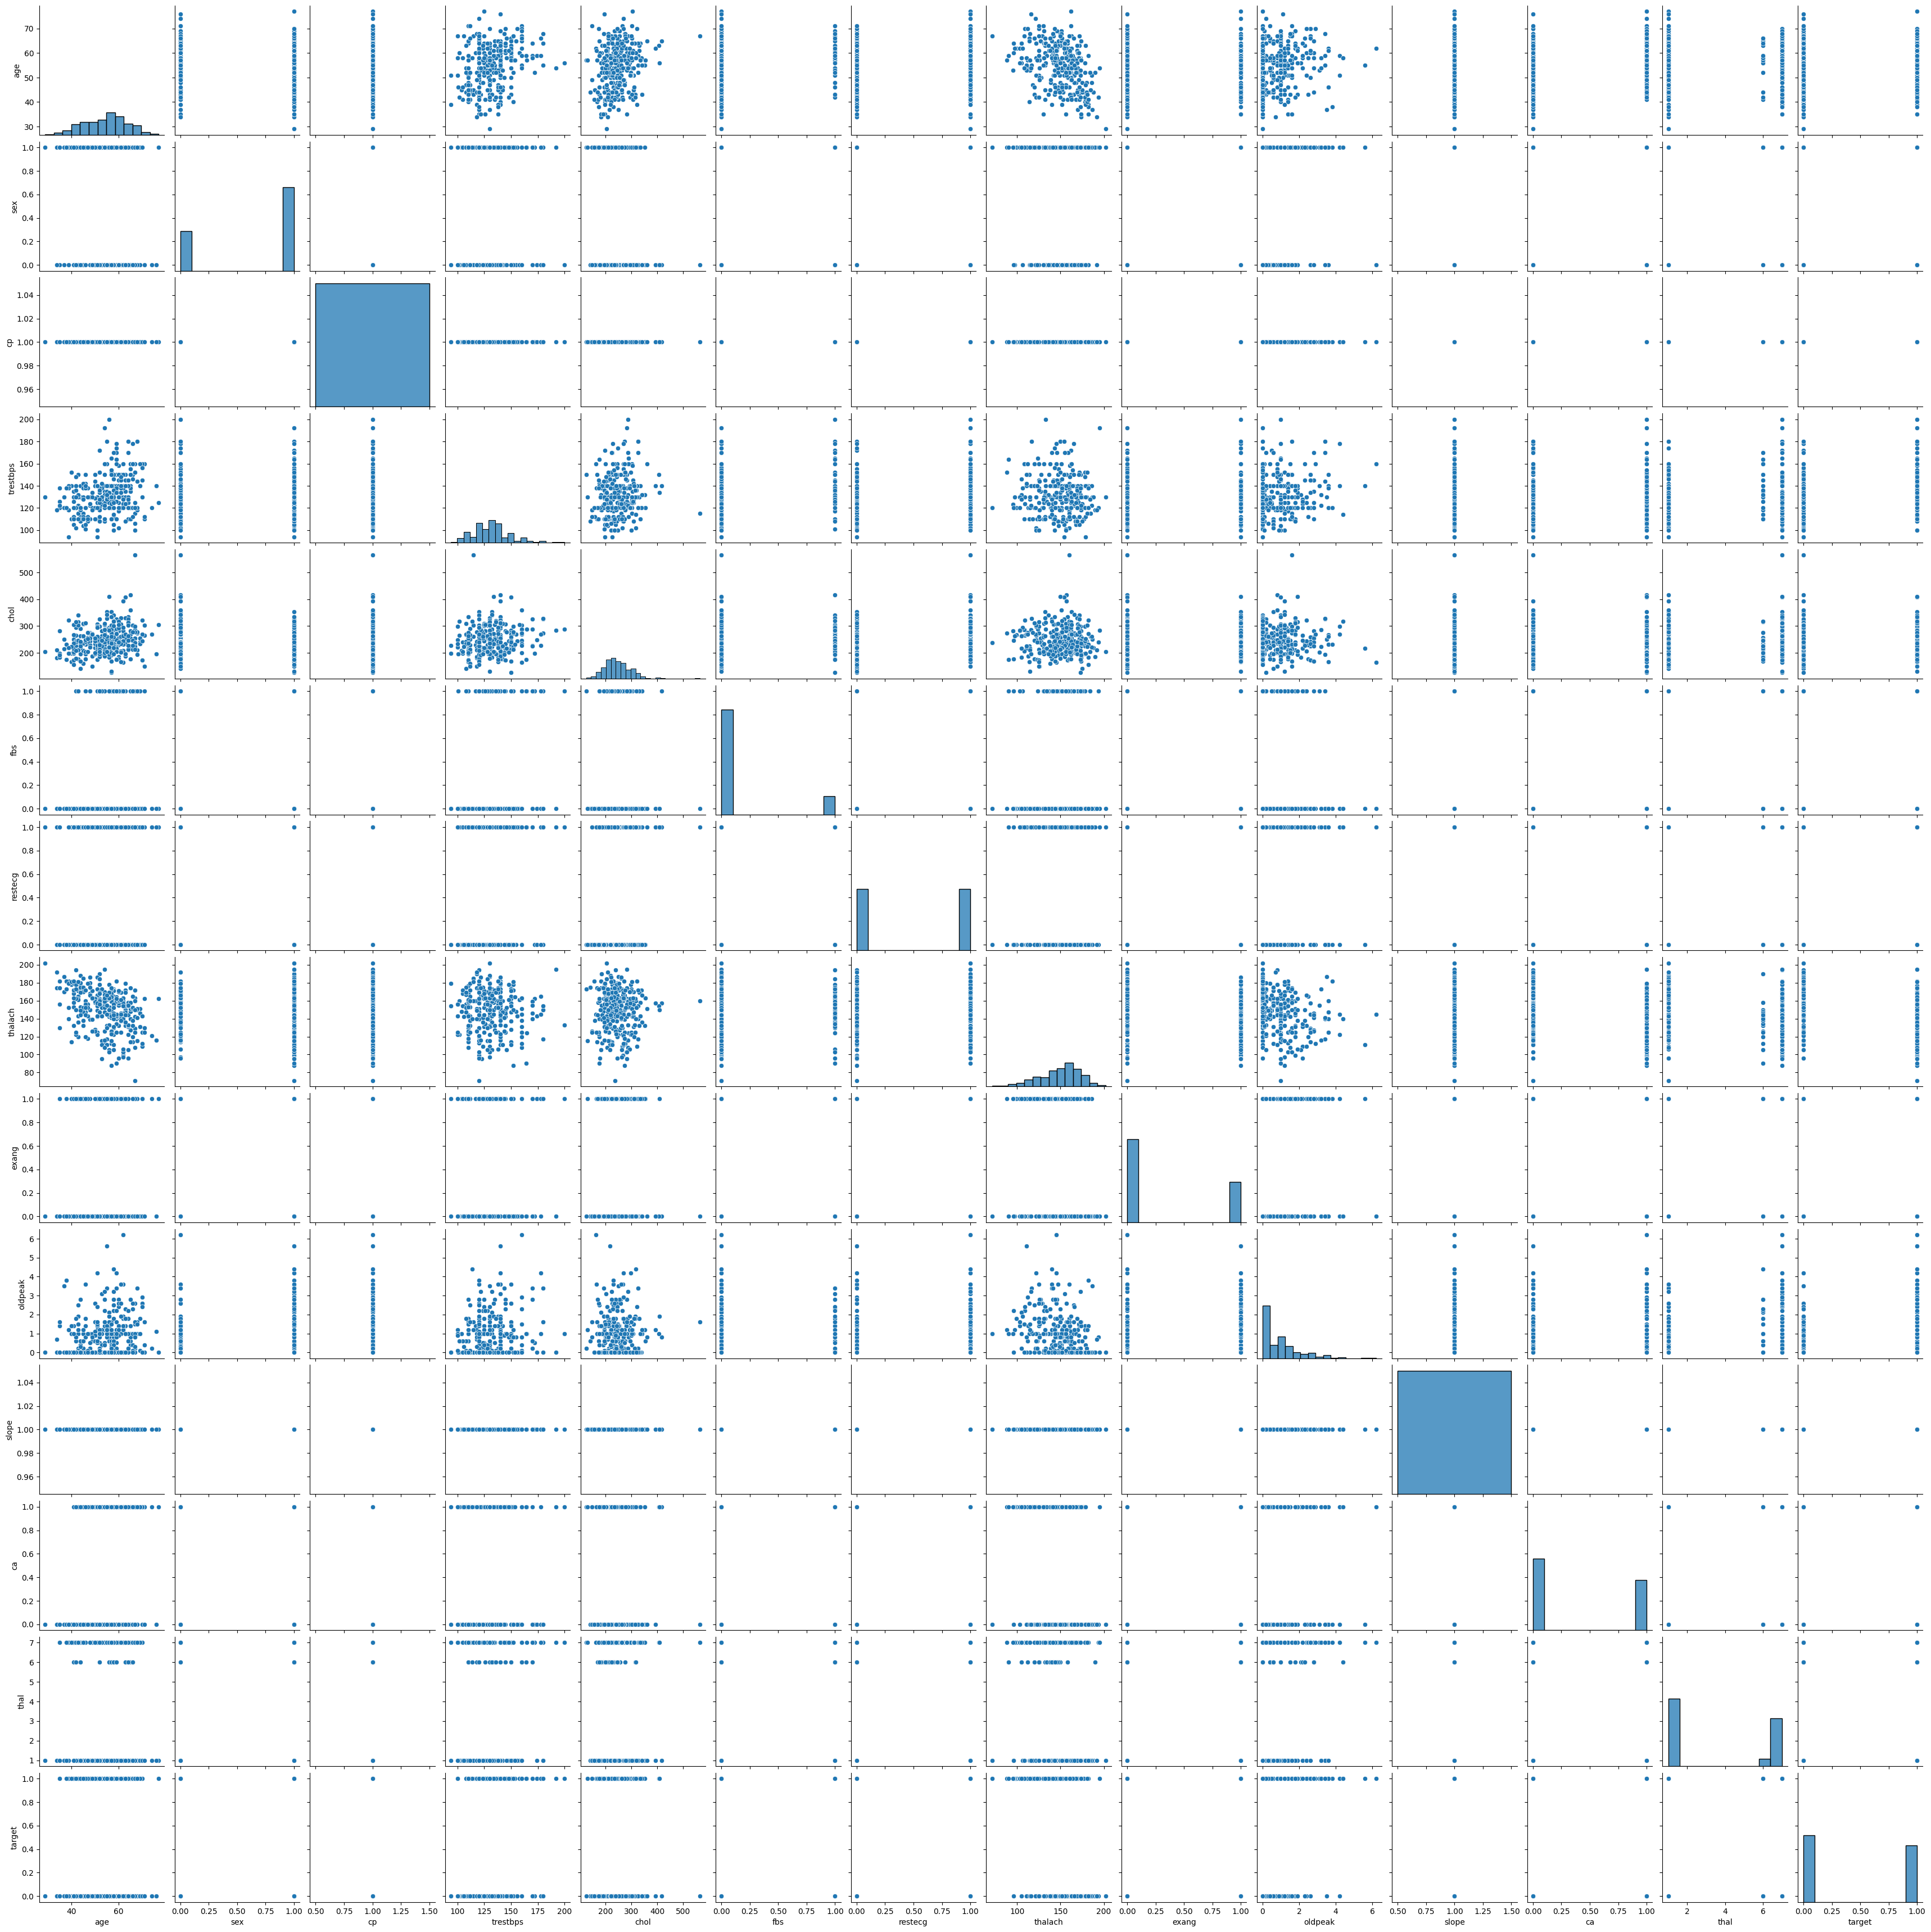

In [7]:
sns.pairplot(df)

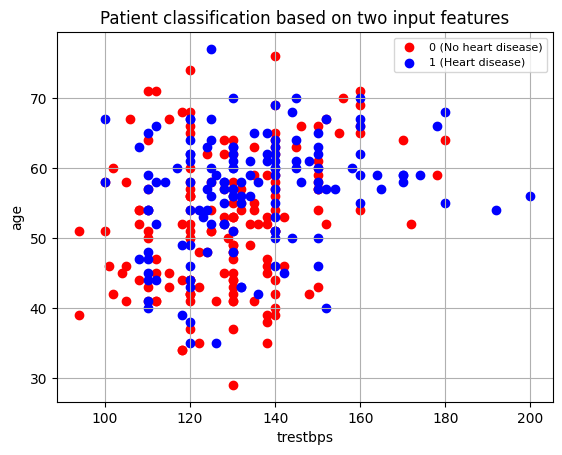

In [34]:
import matplotlib.pyplot as plt

plt.title("Patient classification based on two input features")
plt.scatter(x=df[df.target==0].trestbps, y=df[df.target==0].age, color='red', label='0 (No heart disease)')
plt.scatter(x=df[df.target==1].trestbps, y=df[df.target==1].age, color='blue', label='1 (Heart disease)')
plt.xlabel('trestbps')
plt.ylabel('age')
plt.legend(fontsize=(8))
plt.grid()
plt.show()


In [9]:
# Let´s grab our X and y variables from the dataset
X=df[["trestbps", "age"]]
y=df["target"]
n_samples, n_features =X.shape
print(n_samples, n_features)
# Now use train_test_split method to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# X_train = X_train.values.reshape(-1, 1) #X_train was (1600,), I need it to be (1600,1)

(242, 2) (61, 2) (242,) (61,)


In [10]:
#Create an instance of the class
model=LogisticRegression()
#Train the instance calling the function fit
model.fit(X_train.values.reshape(-1,n_features), y_train)
# DISCLAIMER: If you want to use as X the sex, you have to convert it into decimal as with int the model does not work
# X_train.values.reshape(-1,1)!=X_train!=X_train.values comparalo
# It is only needed for X input, not y

In [11]:
"""
Let´s check the performance of the model not only with the test set but also
with the training set.
"""
_,_,_,_,y_train_pred=model.predict(X_train.values.reshape(-1,n_features))
weights,bias,linear_pred,y_pred,y_test_pred=model.predict(X_test.values.reshape(-1,n_features))
#Compute the accuracy
accuracy_train=model.accuracy(y_train, y_train_pred)
accuracy_test=model.accuracy(y_test, y_test_pred)
print("Accuracy in training: ", accuracy_train)
print("Accuracy in test: ", accuracy_test)

Accuracy in training:  0.5578512396694215
Accuracy in test:  0.47540983606557374


In [12]:
df["target"].unique()

array([0, 1])

In [13]:
X_test_label = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
X_test_label


,trestbps,age,target
179,130.0,53.0,0
228,110.0,54.0,1
111,125.0,56.0,1
246,100.0,58.0,1
60,130.0,51.0,1
...,...,...,...
249,128.0,62.0,0
104,120.0,49.0,1
300,130.0,57.0,1
193,138.0,62.0,1


In [14]:
weights

array([-1.64330475,  0.60879345])

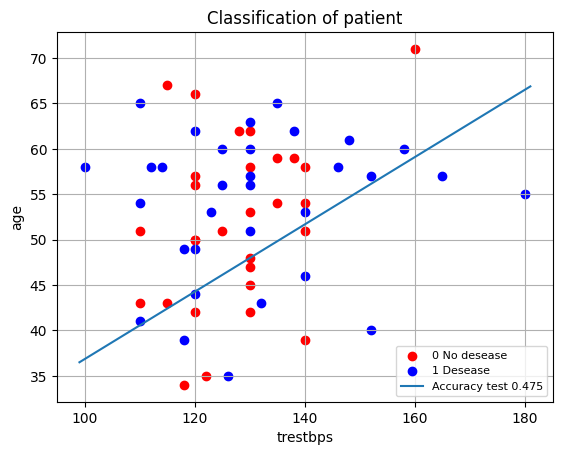

In [15]:
#Let´s plot the dataset and predictions
import matplotlib.pyplot as plt

#plt.scatter(X_train, y_train, c='y', alpha=0.2, label='Train data')
#plt.plot(X_train, y_train_pred, c="orange", linestyle="dashdot", label="Fit training set")
#Comment previous line if you want to see the test fit only

plt.scatter(x=X_test_label[X_test_label.target==0].trestbps, y=X_test_label[X_test_label.target==0].age, color='red', label='0 No desease')
plt.scatter(x=X_test_label[X_test_label.target==1].trestbps, y=X_test_label[X_test_label.target==1].age, color='blue', label='1 Desease')

x_min, x_max = X_test_label.iloc[:, 0].min() - 1, X_test_label.iloc[:, 0].max() + 1
y_min, y_max = X_test_label.iloc[:, 1].min() - 1, X_test_label.iloc[:, 1].max() + 1

w=weights

def graph(formula, x_range):
  x=x_range
  y=formula(x)
  plt.plot(x,y, label=f"Accuracy test {accuracy_test:.3f}")
def my_formula(x):
  """
  To calculate the y-axis that separates the classification we use the straight line:
  y = -(b + w_1x_1 + w_2x_2 + ... + w_p*x_p)/w_0
  """
  return -(bias + w[1]*x)/w[0] #Es correcto el orden de weights? Comprobar
graph(my_formula, np.linspace(x_min,x_max, 100))
plt.grid()
plt.legend(fontsize=8)
plt.title("Classification of patient")
plt.xlabel("{}".format(X_test_label.columns[0]))
plt.ylabel("{}".format(X_test_label.columns[1]))
plt.show()

In [16]:
#Let´s try creating two blobs of data.
from sklearn.datasets import make_blobs
m=100
X,y =make_blobs(n_samples=m, centers=2, n_features=2, cluster_std=3, random_state=11)

df=pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors={0:"blue", 1:"red"}

In [20]:
df

,x,y,label
0,-4.251990,1.360776,1
1,-11.446939,-13.167761,0
2,-1.528656,9.125306,1
3,5.869939,4.387478,1
4,-6.419460,-10.569389,0
...,...,...,...
95,-2.520782,-12.503110,0
96,-9.635188,-10.906668,0
97,-6.820287,-8.454433,0
98,-10.311252,-12.968921,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_samples , n_features = X.shape
print(n_samples, n_features)
#Create an instance of the class
model=LogisticRegression()
#Train the instance calling the function fit
model.fit(X_train.reshape(-1,n_features), y_train)
# DISCLAIMER: If you want to use as X the sex, you have to convert it into decimal as with int the model does not work
# Observe that here we don´t have to use X_train.values because X does not come from a pandas, it is an array created from make_blobs
# It is only needed for X input, not y

(80, 2) (20, 2) (80,) (20,)
100 2


In [22]:
X_test.reshape(-1,n_features)

array([[ -4.12231267,   4.54966923],
       [ -3.19193085, -12.79539852],
       [ -5.7425616 ,  -9.25703666],
       [  1.71767923,   4.60906285],
       [ -7.96386912, -10.36432594],
       [ -2.2258209 ,   6.01374433],
       [ -6.1793269 ,  -8.79567628],
       [ -1.90914887,   9.10134563],
       [ -6.95193219, -10.75210442],
       [ -4.25198957,   1.36077562],
       [ -4.85095053,   4.41372357],
       [ -0.93863516,   3.25904932],
       [ -0.8817371 ,   9.87327187],
       [-11.03519393,  -5.72363942],
       [ -9.57956943, -11.66394918],
       [ -6.41946011, -10.56938926],
       [ -5.33205704,   5.15528432],
       [ -6.48783149, -11.66083505],
       [ -3.77178792,  -9.39553887],
       [ -6.91186552,  -9.33498005]])

In [23]:
"""
Let´s check the performance of the model not only with the test set but also
with the training set.
"""
_,_,_,_,y_train_pred=model.predict(X_train.reshape(-1,n_features))
weights,bias,linear_pred,y_pred,y_test_pred=model.predict(X_test.reshape(-1,n_features))


#Compute the accuracy
accuracy_train=model.accuracy(y_train, y_train_pred)
accuracy_test=model.accuracy(y_test, y_test_pred)
print("Accuracy in training: ", accuracy_train)
print("Accuracy in test: ", accuracy_test)

Accuracy in training:  0.975
Accuracy in test:  1.0


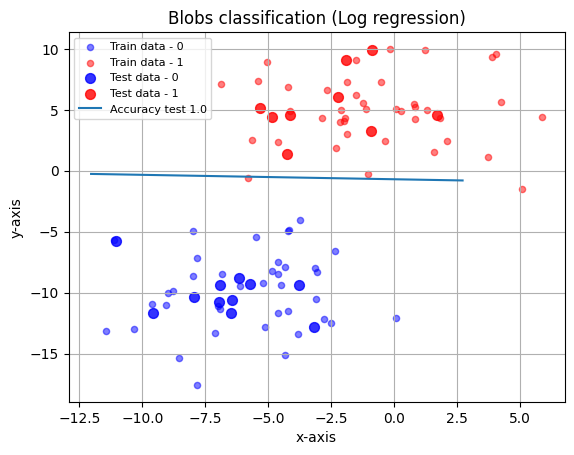

In [28]:
fig, ax=plt.subplots()
grouped_train = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train)).groupby("label")
for key, group in grouped_train:
    group.plot(ax=ax, kind="scatter", x="x", y="y", label=f'Train data - {key}', color=colors[key], alpha=0.5)
grouped_test = pd.DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_test)).groupby("label")
for key, group in grouped_test:
    group.plot(ax=ax, kind="scatter", x="x", y="y", label=f'Test data - {key}', color=colors[key], s=50, alpha=0.8)


x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

w=weights
def graph(formula, x_range):
  x=x_range
  y=formula(x)
  plt.plot(x,y, label=f"Accuracy test {accuracy_test}")
def my_formula(x):
  """
  To calculate the y-axis that separates the classification we use the straight line:
  y = -(b + w_1x_1 + w_2x_2 + ... + w_p*x_p)/w_0

  Nonetheless, my straight line only works correctly when:
  y=-(b+w_0*x)/w_1

  Why? Find an explanation. Does it have something to do with pandas vs make_blobs? I don´t think so
  Find an explanation.
  """
  return -(bias + w[0]*x)/w[1]
graph(my_formula, np.linspace(x_min,x_max, 100))
plt.title("Blobs classification (Log regression)")
plt.grid()
plt.legend(fontsize=8)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()